In [1]:
import os
wd = os.getcwd()
wd = os.path.dirname(os.path.dirname(wd))
import sys
sys.path.append(wd+"\\src\\")

In [2]:
from tube import InterpXY,Tube,BorderSimple
from math import *
import numpy as np
import numpy.random as rnd
from powderlayer import PowderBD, PowderOvLayer, Powder
from gaslayer import GasEOS, GasLayer
from pistonlayer import ElPistEOS, ElPistLayer
import pprint as pp

In [3]:
from tqdm import tqdm_notebook
from matplotlib.patches import Polygon
import matplotlib as mpl
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets
mpl.rcParams['figure.figsize'] = (5,3) 

import json
from functional import seq

In [4]:
with open(wd+"\\src\\" + 'gpowders.json') as f:
    all_powders = json.load(f)
all_powders.keys()

dict_keys(['СФ 033', 'ВУ фл', 'ВТ', 'ВТМ', 'ВТХ-10', 'ВТХ-20', 'ВТД-25', '4\\1', '4\\1 фл', '4\\7', '4\\7 св', '4\\7 фл ВБП', '4\\7 ПТ-3 фл', '4\\7 Ц гр', '5\\1', '5\\1 х-10', '5\\1 х-20', '5\\1 д-20', '5\\1 д-25', '5\\7 св', '5\\7 н\\а', '5\\7 в\\а', '5\\7 Ц фл', '6\\7 гр', '6\\7 БП гр', '6\\7 фл В БП', '6\\7 П-5 БП фл', '6\\7 фл ', '7\\1', '7\\1 фл БП', '7\\7', '7\\14', '7\\1 УГ', '8\\1 тр', '8\\7', '8\\1 УГ', '9\\7', '9\\7 МН', '9\\7 БП', '11\\1 БП', '11\\7', '11\\1 УГ', '12\\1 Тр', '12\\1 тр БП', '12\\1 тр МН', '12\\7', '12\\7 В\\А', '12\\1 УГ', '14\\1 тр В\\А', '14\\7', '14\\7 В\\А', '14\\7 БП', '15\\1 тр В\\А', '15\\7', '16\\1 тр', '16\\1 тр В\\А', '17\\7', '18\\1 тр', '18\\1 тр БП', '22\\1 тр', '22\\7', '23\\7', '28\\1 тр', '37\\1 тр', 'НДТ-3 16\\1', 'НДТ-3 18\\1', 'НДТ-3 19\\1', 'НДТ-3 23\\1', 'НДТ-3 32\\1', 'НДТ-3 152\\57', 'ДГ-2 15\\1', 'ДГ-2 17\\1', 'ДГ-3 13\\1', 'ДГ-3 14\\1', 'ДГ-3 17\\1', 'ДГ-3 18\\1', 'ДГ-3 20\\1', 'ДГ-3 23\\1', 'ДГ-4 13\\1', '100\\56', '100\\70', '130\\5

In [5]:
tps = sorted([(I_k, k) for k, d in all_powders.items() if isinstance(I_k:=d['I_k'], float) and I_k > 0.1])
good_marks = [name for I_k, name in tps]
I_ks = np.array([I_k for I_k, name in tps])

In [6]:
inds = np.abs(0.3 - I_ks)
inds

array([0.15 , 0.13 , 0.08 , 0.07 , 0.05 , 0.03 , 0.02 , 0.   , 0.   ,
       0.02 , 0.02 , 0.03 , 0.05 , 0.05 , 0.07 , 0.08 , 0.09 , 0.1  ,
       0.1  , 0.13 , 0.13 , 0.15 , 0.18 , 0.2  , 0.2  , 0.2  , 0.2  ,
       0.2  , 0.21 , 0.26 , 0.3  , 0.38 , 0.38 , 0.4  , 0.4  , 0.42 ,
       0.46 , 0.51 , 0.52 , 0.53 , 0.54 , 0.57 , 0.58 , 0.6  , 0.6  ,
       0.61 , 0.63 , 0.64 , 0.66 , 0.7  , 0.74 , 0.75 , 0.775, 0.79 ,
       0.79 , 0.8  , 0.82 , 0.83 , 0.84 , 0.85 , 0.86 , 0.86 , 0.88 ,
       0.96 , 0.99 , 1.02 , 1.03 , 1.04 , 1.04 , 1.05 , 1.08 , 1.09 ,
       1.1  , 1.12 , 1.13 , 1.16 , 1.18 , 1.2  , 1.22 , 1.221, 1.23 ,
       1.23 , 1.24 , 1.34 , 1.37 , 1.39 , 1.43 , 1.52 , 1.53 , 1.54 ,
       1.56 , 1.59 , 1.6  , 1.6  , 1.9  , 2.03 , 2.14 , 2.17 , 2.18 ,
       2.2  , 2.29 , 2.4  , 2.41 ])

In [7]:
np.argsort(inds)

array([  8,   7,   6,   9,  10,   5,  11,  13,  12,   4,   3,  14,   2,
        15,  16,  18,  17,   1,  20,  19,   0,  21,  22,  27,  26,  25,
        24,  23,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102],
      dtype=int64)

In [8]:
tps

[(0.15, 'ВУ фл'),
 (0.17, 'СФ 033'),
 (0.22, 'ВТ'),
 (0.23, 'ВТМ'),
 (0.25, '5\\1'),
 (0.27, 'ВТХ-10'),
 (0.28, '4\\7 ПТ-3 фл'),
 (0.3, '4\\1'),
 (0.3, '4\\7 Ц гр'),
 (0.32, '4\\7'),
 (0.32, '5\\7 н\\а'),
 (0.33, '4\\7 св'),
 (0.35, '5\\7 Ц фл'),
 (0.35, '5\\7 св'),
 (0.37, '5\\7 в\\а'),
 (0.38, '4\\7 фл ВБП'),
 (0.39, 'ВТХ-20'),
 (0.4, '4\\1 фл'),
 (0.4, '7\\14'),
 (0.43, '6\\7 фл '),
 (0.43, '6\\7 фл В БП'),
 (0.45, 'ВТД-25'),
 (0.48, '6\\7 П-5 БП фл'),
 (0.5, '5\\1 х-10'),
 (0.5, '6\\7 гр'),
 (0.5, '7\\1'),
 (0.5, '7\\7'),
 (0.5, '8\\7'),
 (0.51, '7\\1 фл БП'),
 (0.56, '6\\7 БП гр'),
 (0.6, '9\\7'),
 (0.68, '11\\7'),
 (0.68, '5\\1 д-20'),
 (0.7, '5\\1 х-20'),
 (0.7, '8\\1 тр'),
 (0.72, '12\\7 В\\А'),
 (0.76, '9\\7 МН'),
 (0.81, '12\\7'),
 (0.82, '5\\1 д-25'),
 (0.83, '14\\7 В\\А'),
 (0.84, '14\\1 тр В\\А'),
 (0.87, '12\\1 Тр'),
 (0.88, '12\\1 тр МН'),
 (0.9, '7\\1 УГ'),
 (0.9, 'ДГ-4 13\\1'),
 (0.91, '15\\1 тр В\\А'),
 (0.93, '15\\7'),
 (0.94, '9\\7 БП'),
 (0.96, '14\\7'),
 (1.0, '8\

In [9]:
from opti.Chromosome import DRange, SRange,ChromoController
from conegene import ConeGene
import numpy.random as rnd
from copy import deepcopy
from scipy.special import softmax
import pickle

In [10]:
with open(wd+"\\src\\" + 'gpowders.json') as f:
    all_powders = json.load(f)

class StructureVariant:
    def __init__(self, struct_str):
        self.struct_str = struct_str.upper()
        self._init_chromo_contrs()
        
    def get_chromo(self):
        res =  {
            'muzzle': self.Muzzle_cc.get_chromo(),
            'layers': [lr.get_chromo() for lr in self.Layers_cc],
            'borders': [br.get_chromo() for br in self.Borders_cc]
        }
        return self.synch_powders(res)
    
    def cross(self, chromo1, chromo2):
        res = {
            'muzzle': self.Muzzle_cc.cross(chromo1['muzzle'], chromo2['muzzle']),
            'layers': [lr_cc.cross(ch1, ch2) for lr_cc, ch1, ch2 in zip(self.Layers_cc, chromo1['layers'], chromo2['layers'])],
            'borders': [lr_cc.cross(ch1, ch2) for lr_cc, ch1, ch2 in zip(self.Borders_cc, chromo1['borders'], chromo2['borders'])]
        }
        return self.synch_powders(res)
    
    def mutate(self, chromo, n_genes):
        res = deepcopy(chromo)
        for i in range(n_genes):
            p = np.array([1, len(res['layers']), len(res['borders'])])
            what_mutate = rnd.choice(['muzzle', 'layers', 'borders'], p=p/np.sum(p))
            if what_mutate == 'muzzle':
                res['muzzle'] = self.Muzzle_cc.mutate(res['muzzle'])
            elif what_mutate == 'layers':
                i_lr = rnd.choice(len(res['layers']))
                res['layers'][i_lr] = self.Layers_cc[i_lr].mutate(res['layers'][i_lr])
            else:
                i_br = rnd.choice(len(res['borders']))
                res['borders'][i_br] = self.Borders_cc[i_br].mutate(res['borders'][i_br])
        return self.synch_powders(res)
        
    
    def synch_powders(self, res):
        for i, lr_type in enumerate(self.struct_str):
            if lr_type == 'P':
                I_k = res['layers'][i]['mark_i']
                res['layers'][i]['mark'] = self.good_marks[np.argmin(np.abs(I_k - self.I_ks))]
        return res
        
    def _init_chromo_contrs(self):
        self.Muzzle_cc = self._get_muzzle_chromo_contr()
        self.Layers_cc = []
        self.Borders_cc = []
        for lr_type in self.struct_str:
            if lr_type == 'G':
                self.Layers_cc.append(self._get_gas_chromo_contr())
            elif lr_type == 'P':
                self.Layers_cc.append(self._get_powder_chromo_contr())
            elif lr_type == 'E':
                self.Layers_cc.append(self._get_elastic_chromo_contr())
            self.Borders_cc.append(self._get_border_chromo_contr())
        self.Borders_cc[-1] = self._get_border_chromo_contr(last=True)
        
    def _get_gas_chromo_contr(self):
        gas_type = SRange(['Air', 'He', 'CO2'], 'gas_type')
        W_gas = DRange(0.012, 0.05, 'W_gas')
        p_gas = DRange(0.1e6, 150e6, 'p_gas')
        return ChromoController([gas_type, W_gas, p_gas])
    
    def _get_elastic_chromo_contr(self):
        return ChromoController([DRange(0.1, 10, 'm_dp')])
    
    def _get_powder_chromo_contr(self):
        tps = sorted([(I_k, k) for k, d in all_powders.items() if isinstance(I_k:=d['I_k'], float) and I_k > 0.1])
        self.good_marks = [name for I_k, name in tps]
        self.I_ks = np.arange(len(self.good_marks))
        
        mark = SRange(self.good_marks, 'mark')
        omega = DRange(0.5, 15, 'omega')
        mark_i = DRange(self.I_ks[0], self.I_ks[-1], 'mark_i')
        delta = DRange(300, 1000, 'delta')
        t_ign = DRange(0, 2e-3, 't_ign')
        return ChromoController([mark, mark_i, omega, delta, t_ign])
    
    def _get_border_chromo_contr(self, last=False):
        m_pr = DRange(0.1, 10, 'm_pr')
        p_f = DRange(0.1e6, 60e6, 'p_f')
        genes = [p_f] if last else [m_pr, p_f]
        return ChromoController(genes)
        
    def _get_muzzle_chromo_contr(self):
        self.d1 = 0.125
        L1 = DRange(2,6,'L1')
        L2 = DRange(1,4,'L2')
        Lcone = DRange(0.3,2.5,'Lcone')
        d2 = DRange(0.085, self.d1, 'd2') 
        Cone = ConeGene(Lcone, d2, self.d1, 3)
        return ChromoController([L1, L2, Cone])
    
    def chromo_to_sandw_dict(self, chromo):
        muzzle = chromo['muzzle']
        x1 = muzzle['L1']
        tube_points = [(0, self.d1), (x1, self.d1)]
        Cone = muzzle['Cone']
        for x, d in Cone['points_xd']:
            tube_points.append((x1 + x, d))
        tube_points.append((x1 + Cone['Lcone'], Cone['d2']))
        tube_points.append((x1 + Cone['Lcone'] + muzzle['L2'], Cone['d2']))
        
        layers = []
        for lr_dict, lr_type in zip(chromo['layers'], self.struct_str):
            if lr_type == 'G':
                name = lr_dict['gas_type']
                d = {
                    'type': 'gas',
                    'name': name,
                    'gamma': 1.4 if name=='Air' else 1.3 if name=='CO2' else 1.66,
                    'kappa': 0.0010838 if name=='Air' else 0.0009702 if name=='CO2' else 0.005925,
                    'R': 287. if name=='Air' else 189. if name=='CO2' else 2078.,
                    'T_0': 283, # K
                    'W_0': lr_dict['W_gas'],  # м^3 объем газа
                    'p_0': lr_dict['p_gas'], # начальное давление газа
                    'u_0': 0     #начальная скорость 
                }
            elif lr_type == 'P':
                name = lr_dict['mark']
                d = {
                    'type': 'powder',
                    'powder': all_powders[name],
                    'omega': lr_dict['omega']*1000,
                    'delta': lr_dict['delta'],
                    't_ign': lr_dict['t_ign'], # начало горения
                    'p_0': 5e6, # начальное давление
                    'u_0': 0,     #начальная скорость
                }
            else:
                d = {
                    'type': 'pist',
                    'omega': lr_dict['m_dp'],  # кг
                    'p_0': 5e6, # начальное давление в полиэтилене
                    'u_0': 0,     #начальная скорость
                    'ElPistEOS_kwargs': dict(
                        k=1.63098, 
                        c_0=2308, 
                        ro_0=919.03, 
                        sigma_star=25.2, 
                        k_0=0.054, 
                        b_1=0.027, 
                        b_2=0.00675, 
                        tau_0=1.36, 
                        mu=0.001, 
                        tau_s=1,                 
                        zeroP=False, 
                        zeroE=True)
                }
            layers.append(d)
        
        borders = [
            {
            'mass': 1000, # kg
            'p_f': 100000e6, #Pa
            't_init': -1,
            'w_border': 0.00, #m
        }]
        for bd in chromo['borders'][:-1]:
            borders.append({
                'mass': bd['m_pr'],
                'p_f': bd['p_f'],
                't_init': -1,
                'w_border': 0
            })
        borders.append({
            'mass': 5.3,
            'p_f': chromo['borders'][-1]['p_f'],
            't_init': -1,
            'w_border': 0,
            'p_a_right': 1e5
        })
        return {
            'tube': {'tube_points': tube_points},
            'x_left': 0,
            'layers': layers,
            'borders': borders,
            'calc_settings': {
                'powder_settings': {
                    'cell_dx': 0.0025,
                    'n_cells_min': 13,
                    'n_cells_max': 2000,
                    'GasFluxCalculator_kwargs': {'flux_type':2},
                    'GridStrecher_kwargs': {}
                },
                'gas_settings': {
                    'cell_dx': 0.0025,
                    'n_cells_min': 13,
                    'n_cells_max': 2000,
                    'GasFluxCalculator_kwargs': {'flux_type':2},
                    'GridStrecher_kwargs': {}
                },
                'pist_settings': {
                    'cell_dx': 0.0025,
                    'n_cells_min': 13,
                    'n_cells_max': 2000,
                    'GasFluxCalculator_kwargs': {'flux_type':1},
                    'GridStrecher_kwargs': {}
                }
            }
        }
        
                

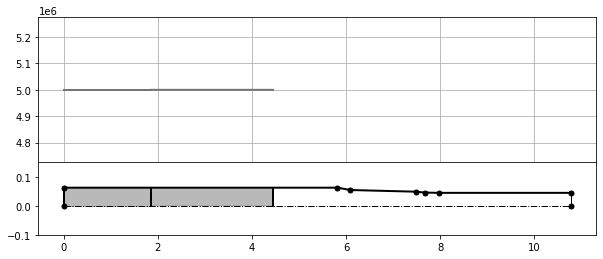

Sandwich i=0; t=0.0 ms;  vel=0.0 m/s;  p_max=5.0 MPa
layers:
0) PowderOvLayer(n_cells=741); 
        {'p_max':5000000.0, 'tau_min': 1.8280309515042764e-05, 
        'u_max': 0.0, 'cs_max': 136.8409705909044, 'dx_min': 0.002501495296740597, 
        'x_1': 0.0, 'x_2': 1.8536080148849123,
        'V_1':  0.0, 'V_2':  0.0  }
        { 'powder': r'28\1 тр', 'z_max': 0.0, 't_ign'=0.0009792683271978816 }
1) PowderOvLayer(n_cells=1039); 
        {'p_max':5000000.0, 'tau_min': 1.823678661108062e-05, 
        'u_max': 0.0, 'cs_max': 137.09684292147, 'dx_min': 0.002500205869411687, 
        'x_1': 1.8536080148849123, 'x_2': 4.451321913204083,
        'V_1':  0.0, 'V_2':  0.0  }
        { 'powder': r'12\7', 'z_max': 0.0, 't_ign'=0.0014675042499399478 }

In [11]:
from sandwich import Sandwich   

sv = StructureVariant('PP')
sandwich_dict = sv.chromo_to_sandw_dict(sv.get_chromo())

sandw0 = Sandwich.get_standart(sandwich_dict)

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(10,4), gridspec_kw={'height_ratios':[2, 1]})
sandw0.plot_param(fig, ax1, 'ps')
sandw0.plot(fig, ax2)
ax2.set_ylim(-0.1,0.15)
ax1.grid(True)
plt.subplots_adjust(hspace=.0)

plt.show()

sandw0

In [12]:
def foo(sandwich_dict):
    from sandwich import Sandwich   
    import numpy as np
    from math import sqrt, pi
    
    def get_p_a(v_p):
        p_a = 1e5
        k_air = 1.4
        c_0a = 340
        mach = v_p/c_0a
        mach_ = (k_air+1)*v_p/4/c_0a           
        p_a *= 1 + k_air*(k_air+1)/4*(mach*mach) + k_air*mach*sqrt(1+mach_*mach_)
        return p_a
    
    try:
        sandw = Sandwich.get_standart(sandwich_dict)
        p_max = 0
        v = 0
        for i in range(150000):
            p_maxi = sandw.get_p_max()
            if p_maxi > p_max:
                p_max = p_maxi
            if p_maxi > 700e6:
                break
            if sandw.get_x_projectile() > sandw.tube.get_x_right():
                break
            v = sandw.layers[-1].Vs_borders[-1]
            sandw.borders[-1].p_a_right = get_p_a(v)
            sandw = sandw.simple_step(0.49)
        return True, v, p_max
    except Exception as e:
        return False, str(e), 0


In [13]:
foo(sandwich_dict)

(True, 647.9437342254611, 700120247.6666571)

In [14]:
from distributed import Client

cl = Client('172.16.49.81:8786')
cl

Client Scheduler: tcp://172.16.49.81:8786 Dashboard: http://172.16.49.81:8787/status,Cluster Workers: 140 Cores: 140 Memory: 231.17 GB


In [15]:
cl.upload_file('sandwich.py')

In [16]:
sv = StructureVariant('GP')

In [17]:
# import pickle
# with open('PEGE.bin', 'rb') as f:
#     history = pickle.load(f)

In [18]:
# import pickle
# with open('PEGEpool.bin', 'wb') as f:
#     pickle.dump(person_pool, f)

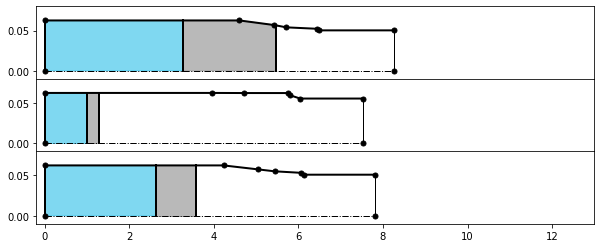

In [19]:
chromo1 = sv.get_chromo()
chromo2 = sv.get_chromo()
chromo3 = sv.cross(chromo1, chromo2)

sandwich_dict1 = sv.chromo_to_sandw_dict(chromo1)
sandw1 = Sandwich.get_standart(sandwich_dict1)

sandwich_dict2 = sv.chromo_to_sandw_dict(chromo2)
sandw2 = Sandwich.get_standart(sandwich_dict2)

sandwich_dict3 = sv.chromo_to_sandw_dict(chromo3)
sandw3 = Sandwich.get_standart(sandwich_dict3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, figsize=(10,4), gridspec_kw={'height_ratios':[1, 1, 1]})

sandw1.plot(fig, ax1)
ax1.set_ylim(-0.01,0.08)
ax1.set_xlim(-0.2, 13)

sandw2.plot(fig, ax2)
ax2.set_ylim(-0.01,0.08)
ax2.set_xlim(-0.2, 13)

sandw3.plot(fig, ax3)
ax3.set_ylim(-0.01,0.08)
ax3.set_xlim(-0.2, 13)


plt.subplots_adjust(hspace=.0)
plt.show()

In [20]:
# history = []
# for gener in generations:
#     for chromo, result in zip(*gener):
#         history.append({
#             'chromo': chromo,
#             'result': result,
#             'fitness': None
#         })

In [21]:

# for person in history:
#     fitness(person)
# history = [person for person in history if person['fitness'] > -10000]

In [22]:
person_pool = history

NameError: name 'history' is not defined

In [23]:
def fitness(person):
    suc, v, p = person['result']
    if not suc or np.isnan(v) or np.isnan(p):
        person['fitness'] = -99999
        return
    shtraf = 0 if p < 550e6 else 2e-5 * (p - 550e6)
    person['fitness'] = v - shtraf
    
def filternan(gener):
    res = []
    for person in gener:
        suc, v, p = person['result']
        fit = person['fitness']
        if suc and not (np.isnan(v) or np.isnan(p) or np.isnan(fit)) and fit is not None:
            res.append(person)
    return res
    
def get_children(gener, n_children):
    fitnesses = np.array([person['fitness'] for person in gener])
    result = []
    ps = (fitnesses - np.min(fitnesses))/(np.max(fitnesses) - np.min(fitnesses))
    ps /= np.sum(ps)
    for i in range(n_children):
        person1, person2 = rnd.choice(gener, p=ps, size=2)
        result.append({
            'chromo': sv.cross(person1['chromo'], person2['chromo']),
            'result': None,
            'fitness': None
        })
    return result

def get_mutants(gener, n_mutants, m_mut_genes=7):
    result = []
    for m, person in zip(rnd.choice(m_mut_genes, size=n_mutants), rnd.choice(gener, size=n_mutants)):
        result.append({
            'chromo': sv.mutate(person['chromo'], m),
            'result': None,
            'fitness': None
        })
    return result

def get_elite(gener, n_elite):
    fitnesses = np.array([person['fitness'] for person in gener])
    inds = np.argsort(fitnesses)[::-1]
    result = []
    for i in inds[:n_elite]:
        result.append(deepcopy(gener[i]))
    return result

def get_fitnessless(gener):
    return [person for person in gener if person['fitness'] is None]

def get_resultless(gener):
    return [person for person in gener if person['result'] is None]

{'muzzle': {'L1': 5.8163262556129975,
  'L2': 2.2896136556120807,
  'Cone': {'Lcone': 1.2778257098281198,
   'd2': 0.11153535546127402,
   'points_xd': array([[0.29679286, 0.12460018],
          [1.0564996 , 0.12454152],
          [1.10887375, 0.11620286]])}},
 'layers': [{'mark': '180\\57 Ш3 БП',
   'mark_i': 71.92848163013059,
   'omega': 3.9948100092012306,
   'delta': 936.2103362253725,
   't_ign': 4.944704760197505e-05},
  {'m_dp': 3.502546287140527}],
 'borders': [{'m_pr': 3.4601758246603898, 'p_f': 2517456.4064905033},
  {'p_f': 1948158.5526080076}]}

In [23]:

# ps = (fitnesses - np.min(fitnesses))/(np.max(fitnesses) - np.min(fitnesses))
# generation0 = list(rnd.choice(person_pool, p=softmax(ps), size=1700, replace=False))
# plt.hist([person['fitness'] for person in generation0])

In [24]:
history = []

In [25]:
resultless =  [{
    'chromo': sv.get_chromo(),
    'result': None,
    'fitness': None
}for i in range(30000)]
sandw_dicts = [sv.chromo_to_sandw_dict(person['chromo']) for person in resultless]
futs = cl.map(foo, sandw_dicts)

generation_results = cl.gather(futs)
#         generation_results = [(rnd.choice([True, False]), rnd.normal(800,2700), rnd.uniform(500e6, 900e6)) for z in resultless]
#         time.sleep(3)
for person, result in zip(resultless, generation_results):
    person['result'] = result
    fitness(person)

history.append(resultless)

with open(f'{sv.struct_str}.bin', 'wb') as f:
    pickle.dump(history, f)

In [ ]:
# history = [generation0]

In [ ]:
# len(history)

In [26]:
from tqdm.notebook import tqdm
import pickle
import time
import threading

# for i, gener1 in enumerate(history):
#     gener1 = filternan(gener1)
#     fitnesses = np.array([person['fitness'] for person in gener1])
#     imax = np.argmax(fitnesses)
#     print(f'Generation #{i} max fitness {fitnesses[imax]}  V = {gener1[imax]["result"][1]}  p = {gener1[imax]["result"][2]}')
stop_flag = False
def evolve(n):
    for i in tqdm(range(n)):
        gener0 = filternan(history[-1])
        gener1 = get_elite(gener0, 10) + get_children(gener0, 1000) + get_mutants(gener0, 500, 2)

        resultless = get_resultless(gener1)
        sandw_dicts = [sv.chromo_to_sandw_dict(person['chromo']) for person in resultless]
        futs = cl.map(foo, sandw_dicts)
        generation_results = cl.gather(futs)
#         generation_results = [(rnd.choice([True, False]), rnd.normal(800,2700), rnd.uniform(500e6, 900e6)) for z in resultless]
#         time.sleep(3)
        for person, result in zip(resultless, generation_results):
            person['result'] = result
            fitness(person)

        history.append(gener1)

        with open(f'{sv.struct_str}.bin', 'wb') as f:
            pickle.dump(history, f)
        if stop_flag:
            break

#         gener1 = filternan(history[-1])
#         fitnesses = np.array([person['fitness'] for person in gener1])
#         imax = np.argmax(fitnesses)
#         print(f'Generation #{len(history)} max fitness {fitnesses[imax]}  V = {gener1[imax]["result"][1]}  p = {gener1[imax]["result"][2]}')

evolve(100)
threading.Thread(target=evolve, args=(100,)).start()

distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://172.16.49.81:18057 remote=tcp://172.16.49.81:8786>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://172.16.49.81:18093 remote=tcp://172.16.49.81:8786>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://172.16.49.81:18139 remote=tcp://172.16.49.81:8786>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://172.16.49.81:18171 remote=tcp://172.16.49.81:8786>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://172.16.49.81:18198 remote=tcp://172.16.49.81:8786>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://172.16.49.81:18283 remote=tcp://172.16.49.81:8786>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://172.16.49.81:18344 remote=tcp://172.16.49.81:8786>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://172.16.49.81:18384 

In [33]:
stop_flag = True

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError


Generation #175 max fitness 2446.715964288536  V = 2446.715964288536  p = 549975378.7255775
Generation #176 max fitness 2446.715964288536  V = 2446.715964288536  p = 549975378.7255775
Generation #177 max fitness 2446.715964288536  V = 2446.715964288536  p = 549975378.7255775
Generation #178 max fitness 2459.8441906039193  V = 2459.8441906039193  p = 549975378.7254604
Generation #179 max fitness 2459.8441906039193  V = 2459.8441906039193  p = 549975378.7254604
Generation #180 max fitness 2459.8441906039193  V = 2459.8441906039193  p = 549975378.7254604
Generation #181 max fitness 2459.8441906039193  V = 2459.8441906039193  p = 549975378.7254604
Generation #182 max fitness 2459.8441906039193  V = 2459.8441906039193  p = 549975378.7254604
Generation #183 max fitness 2459.8441906039193  V = 2459.8441906039193  p = 549975378.7254604


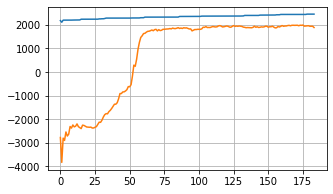

In [32]:
fits, fits_aver = [], []
for i, gener1 in enumerate(history):
    gener1 = filternan(gener1)
    fitnesses = np.array([person['fitness'] for person in gener1])
    imax = np.argmax(fitnesses)
    fits.append(fitnesses[imax])
    fits_aver.append(np.sum(fitnesses)/fitnesses.shape[0])
    if i > len(history) - 10:
        print(f'Generation #{i} max fitness {fitnesses[imax]}  V = {gener1[imax]["result"][1]}  p = {gener1[imax]["result"][2]}')

plt.plot(fits)
plt.plot(fits_aver)
plt.grid()
plt.show()


In [26]:
from pprint import pprint
gener = history[-1]
fitnesses = np.array([person['fitness'] for person in gener])
inds = np.argsort(fitnesses)[::-1]
@interact(ind=ipywidgets.IntSlider(min=0,max=len(gener)-1,step=1, value=0))
def variants(ind):
    person = gener[inds[ind]]
    chromo1 = person['chromo']
    print(person['fitness'], person['result'])

    sandwich_dict1 = sv.chromo_to_sandw_dict(chromo1)
    sandw1 = Sandwich.get_standart(sandwich_dict1)

    fig, ax1 = plt.subplots(nrows=1, sharex=True, figsize=(10,4))#, gridspec_kw={'height_ratios':[1, 1, 1]})

    sandw1.plot(fig, ax1)
    ax1.set_ylim(-0.01,0.08)
    ax1.set_xlim(-0.2, 13)
    plt.show()
    pprint(person)
    

interactive(children=(IntSlider(value=0, description='ind', max=2509), Output()), _dom_classes=('widget-intera…

In [23]:
dir(cl)

['__aenter__',
 '__aexit__',
 '__await__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_asynchronous',
 '_cancel',
 '_close',
 '_connecting_to_scheduler',
 '_dec_ref',
 '_deserializers',
 '_ensure_connected',
 '_expand_key',
 '_expand_resources',
 '_expand_retries',
 '_gather',
 '_gather_future',
 '_gather_keys',
 '_gather_remote',
 '_gather_semaphore',
 '_get_dataset',
 '_get_futures_error',
 '_get_scheduler_info',
 '_get_task_stream',
 '_get_versions',
 '_graph_to_futures',
 '_handle_cancelled_key',
 '_handle_error',
 '_handle_key_in_memory',
 '_handle_lost_data',
 '_handle_report',
 '_handle_restart',
 '_handle_retried_key

In [177]:
from pprint import pprint

In [ ]:
cl.restart()

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
asyncio.exceptions.CancelledError
